In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6  

In [52]:
df1_6 = pd.read_csv('../data_/data_ana/radar_count_2022_01_06.csv')
df1_7_12 = pd.read_csv('../data_/data_ana/radar_count_2022_07_12.csv')

# join two dataframes
df = pd.concat([df1_6, df1_7_12], ignore_index=True)
datatimef = df.copy()
# sort by time_index
df = df.sort_values(by=['time_index'])
df.isnull().sum()   # no missing values

time_index            0
entity_id             0
faixa                 0
vehiclelight          0
speedlight            0
vehicleheavy          0
speedheavy            0
vehicleothers         0
speedothers           0
accelerationlight     0
accelerationheavy     0
accelerationothers    0
dtype: int64

In [53]:
# drop 
df.drop(['speedlight', 'speedheavy', 'speedothers', 'accelerationlight', 'accelerationheavy', 'accelerationothers', 'faixa'], axis=1, inplace=True)

# only for radar 35
df = df[df['entity_id'] == 'urn:ngsi-ld:Count:aveiro_radar:p35']

# create another column thats the sum of all vehicles
df['total'] = df['vehiclelight'] + df['vehicleheavy'] + df['vehicleothers']

df


,time_index,entity_id,vehiclelight,vehicleheavy,vehicleothers,total
689858,2022-01-11 17:22:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,20,0,0,20
689859,2022-01-11 17:22:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,13,0,3,16
689862,2022-01-11 17:23:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,9,0,1,10
689863,2022-01-11 17:23:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,6,0,4,10
689866,2022-01-11 17:24:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,12,2,2,16
...,...,...,...,...,...,...
1510283,2022-12-31 23:55:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,0,1
1510282,2022-12-31 23:56:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,2,0,0,2
1510281,2022-12-31 23:57:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,0,1
1510280,2022-12-31 23:57:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,0,0,2,2


In [54]:
''' # agregate by month
df['time_index'] = pd.to_datetime(df['time_index'])
df = df.set_index('time_index')
df_month = df.resample('M').sum()
df_month = df_month.reset_index()
df_month['time_index'] = df_month['time_index'].dt.strftime('%Y-%m')
df_month
 '''



" # agregate by month\ndf['time_index'] = pd.to_datetime(df['time_index'])\ndf = df.set_index('time_index')\ndf_month = df.resample('M').sum()\ndf_month = df_month.reset_index()\ndf_month['time_index'] = df_month['time_index'].dt.strftime('%Y-%m')\ndf_month\n "

In [55]:

''' # bar plot
plt.bar(df_month['time_index'], df_month['total'])
# plot a line that touches the top of each bar
plt.plot(df_month['time_index'], df_month['total'], color='red', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total vehicles')
plt.title('Total vehicles per month')
plt.show() '''

" # bar plot\nplt.bar(df_month['time_index'], df_month['total'])\n# plot a line that touches the top of each bar\nplt.plot(df_month['time_index'], df_month['total'], color='red', marker='o')\nplt.xticks(rotation=90)\nplt.xlabel('Month')\nplt.ylabel('Total vehicles')\nplt.title('Total vehicles per month')\nplt.show() "

In [56]:
# lets agregate by day and hour 
df['time_index'] = pd.to_datetime(df['time_index'])
df['day'] = df['time_index'].dt.date
df['hour'] = df['time_index'].dt.hour

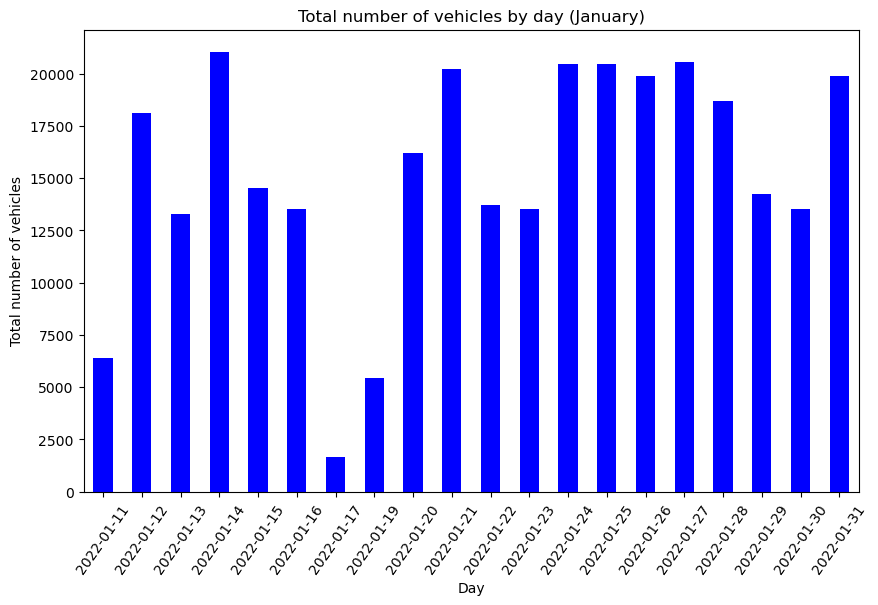

,day,hour,vehiclelight,vehicleheavy,vehicleothers,total
122,2022-01-17,0,113,1,7,121
123,2022-01-17,1,59,2,1,62
124,2022-01-17,2,23,0,3,26
125,2022-01-17,3,20,0,0,20
126,2022-01-17,4,23,1,1,25
127,2022-01-17,5,39,1,1,41
128,2022-01-17,6,101,4,12,117
129,2022-01-17,7,636,33,51,720
130,2022-01-17,8,484,20,34,538


In [57]:

# agregate by day and hour
df = df.groupby(['day', 'hour']).sum().reset_index()
df2 = df.copy()
# lets plot the total number of vehicles by day
df[:421].groupby('day')['total'].sum().plot(kind='bar', color='blue')
plt.title('Total number of vehicles by day (January)')
plt.xlabel('Day')
plt.xticks(rotation=55)
plt.ylabel('Total number of vehicles')
plt.show()

# SHOW THE 2022-01-17 values
x = df[df['day'] == pd.to_datetime('2022-01-17')]
x


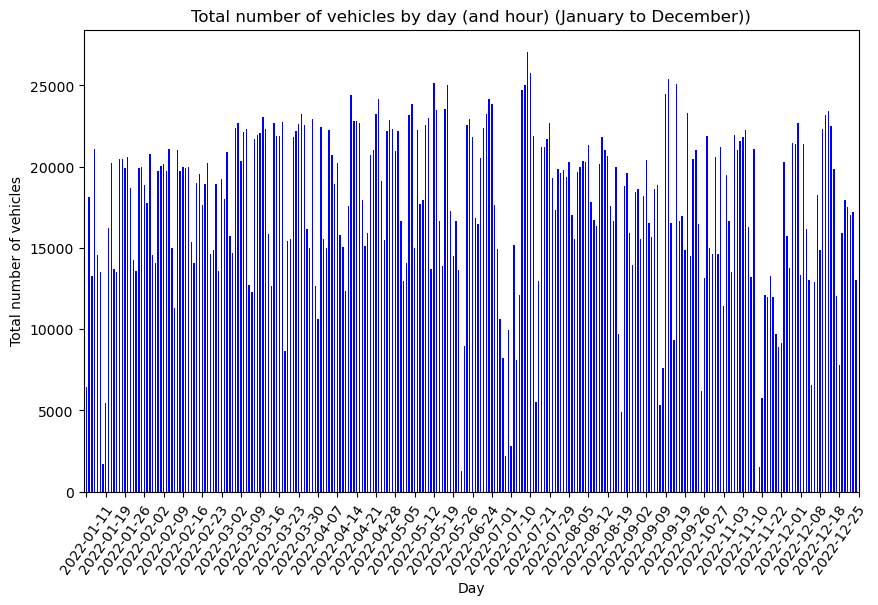

In [58]:

# agregate by day and hour
df = df.groupby(['day', 'hour']).sum().reset_index()

# lets plot the total number of vehicles by day
df.groupby('day')['total'].sum().plot(kind='bar', color='blue')
plt.title('Total number of vehicles by day (and hour) (January to December))')
plt.xlabel('Day')
# erase all xticks
plt.xticks(np.arange(0, 365, 7), rotation=55)
# stretch the x axis
plt.xlim(-1, 280)

plt.ylabel('Total number of vehicles')
plt.show()


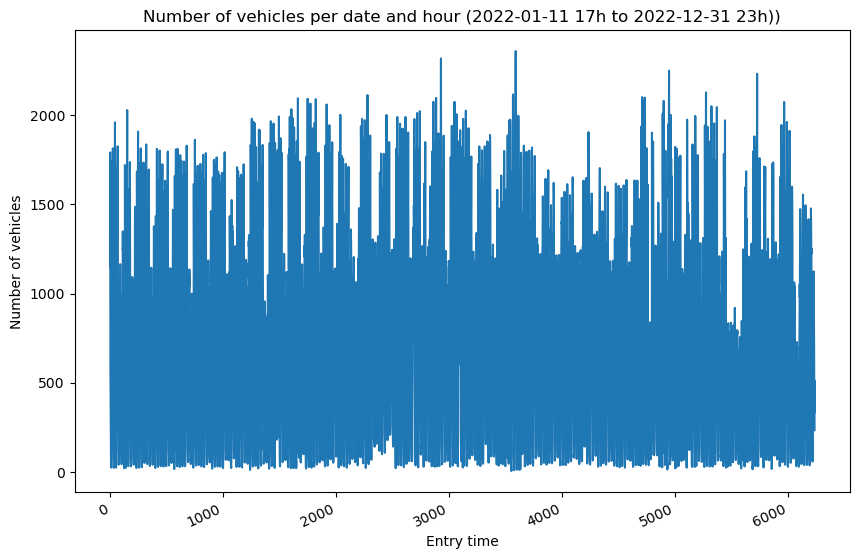

In [59]:
# # plot
plt.xlabel('Entry time')
plt.xticks( rotation=25, ha="right")
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per date and hour (2022-01-11 17h to 2022-12-31 23h))')
plt.plot(df.index, df['total'])

In [60]:
# for all the values that are zero, we will replace them using mice imputer
from fancyimpute import IterativeImputer

# replace all df['total'] values that are zero with nan
df['total'] = df['total'].replace(0, np.nan)

# calling the  MICE class
mice_imputer = IterativeImputer()

df['total'] = mice_imputer.fit_transform(df[['total']])
df

,day,hour,vehiclelight,vehicleheavy,vehicleothers,total
0,2022-01-11,17,938,30,184,1152.0
1,2022-01-11,18,1461,50,281,1792.0
2,2022-01-11,19,1132,17,191,1340.0
3,2022-01-11,20,759,14,124,897.0
4,2022-01-11,21,458,3,79,540.0
...,...,...,...,...,...,...
6227,2022-12-31,19,566,23,125,714.0
6228,2022-12-31,20,279,22,99,400.0
6229,2022-12-31,21,114,21,194,329.0
6230,2022-12-31,22,79,56,377,512.0


In [61]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# ARIMA model
model = ARIMA(df['total'], order=(2, 0, 3)) # p, d, q 
                                            # p: number of lag observations included in the model
                                            # d: number of times that the raw observations are differenced
                                            # q: size of the moving average window, also called the order of moving average
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                 6232
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -42891.956
Date:                Mon, 29 May 2023   AIC                          85797.912
Time:                        20:47:50   BIC                          85845.074
Sample:                             0   HQIC                         85814.259
                               - 6232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        786.4017      9.804     80.210      0.000     767.186     805.618
ar.L1          1.8770      0.008    235.552      0.000       1.861       1.893
ar.L2         -0.9444      0.008   -124.598      0.0

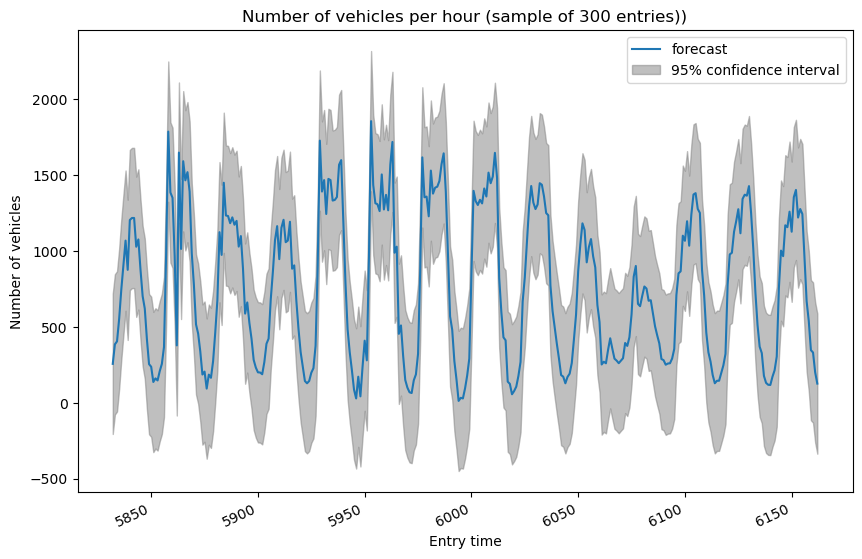

In [62]:
# plot
# plot only the last 500 entries
plot_predict(model_fit, start=len(df)-400, end=len(df)-70)
plt.xlabel('Entry time')
plt.xticks( rotation=25, ha="right")
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per hour (sample of 300 entries))')
plt.show()



In [63]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = df['total'].values

data = data.reshape(-1, 1)  # type: ignore
data



array([[1152.],
       [1792.],
       [1340.],
       ...,
       [ 329.],
       [ 512.],
       [ 233.]])

<AxesSubplot:>

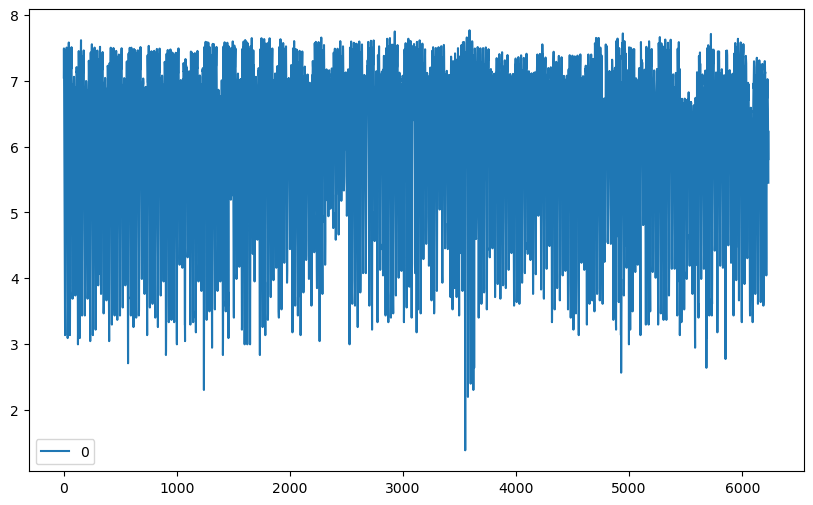

In [65]:
data = np.log(data) # type: ignore

df = pd.DataFrame(data)
df.plot()

In [66]:
# divide into train and test
# set last 100 entries as test
df_train = df[:-100]
df_test = df[-100:]

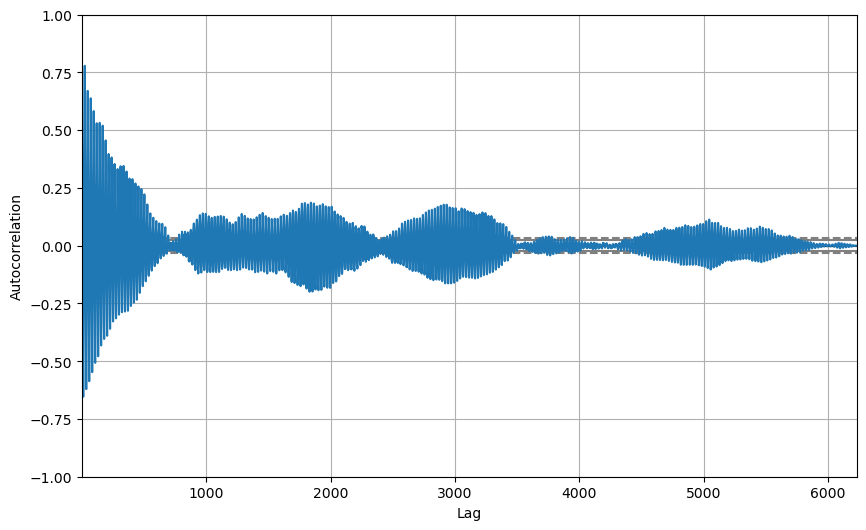

In [67]:
from pandas.plotting import autocorrelation_plot

# plotting autocorrelation from all data
autocorrelation_plot(df2['total'])
plt.show()

# ler

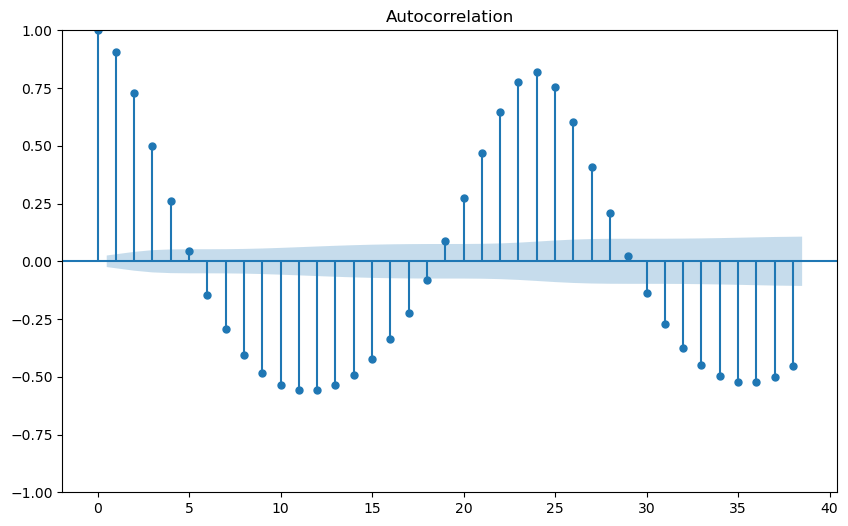

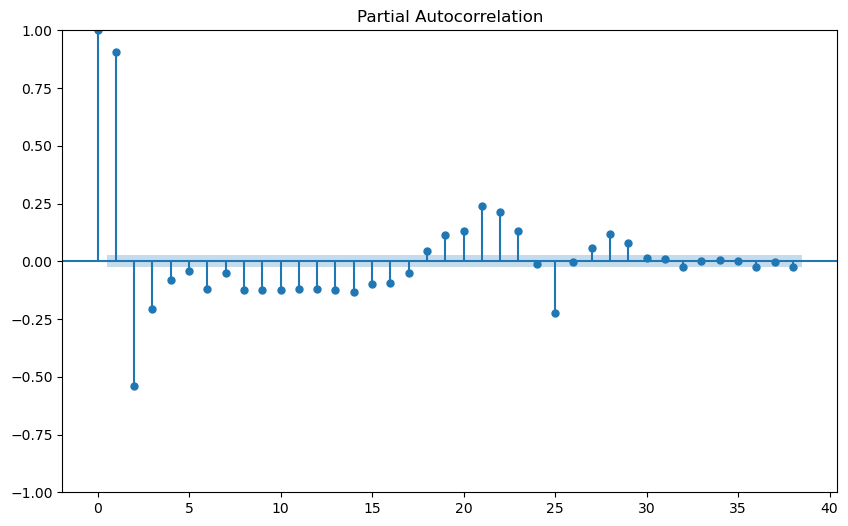

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

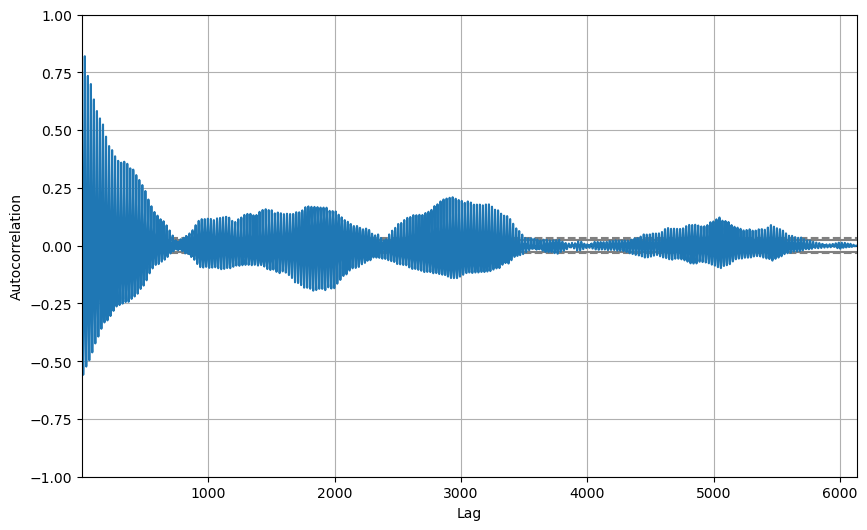

In [69]:
from pandas.plotting import autocorrelation_plot

# plotting autocorrelation
autocorrelation_plot(df_train)
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 9.553337656443235e-18


<AxesSubplot:>

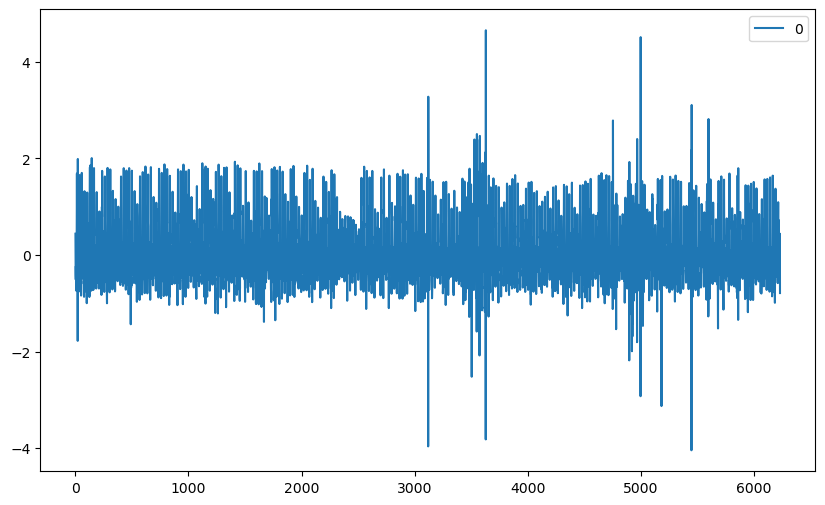

In [71]:
df_train_diff = df.diff().dropna()
df_train_diff.plot()

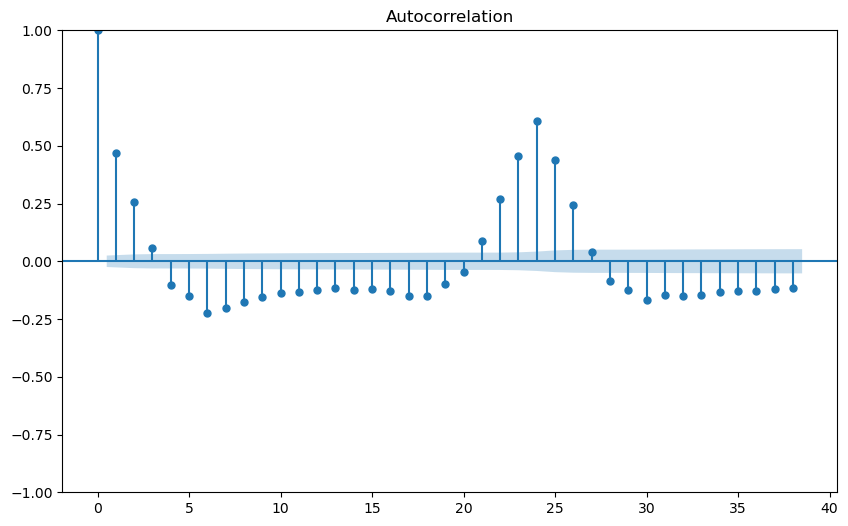

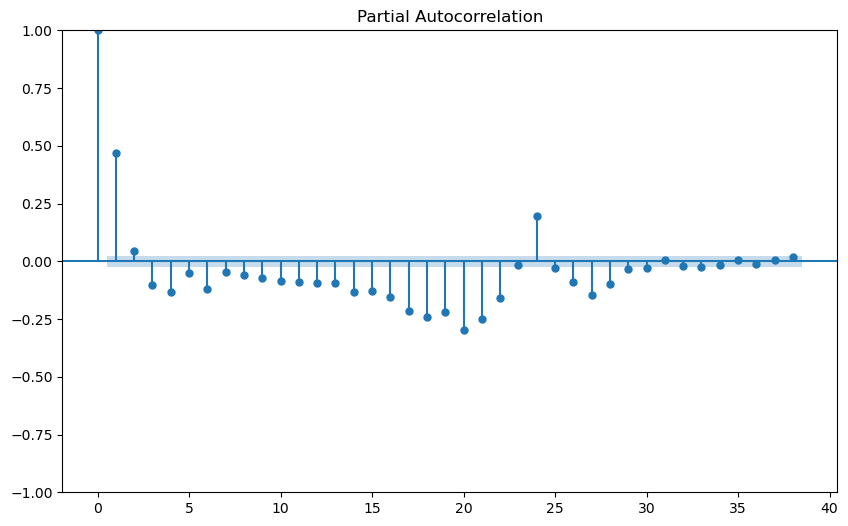

In [72]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)


In [73]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 6132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4050.229
Date:                Mon, 29 May 2023   AIC                           8106.458
Time:                        20:47:51   BIC                           8126.621
Sample:                             0   HQIC                          8113.452
                               - 6132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5190      0.016     32.194      0.000       0.487       0.551
ma.L1         -0.0643      0.016     -3.973      0.000      -0.096      -0.033
sigma2         0.2194      0.002    133.590      0.0

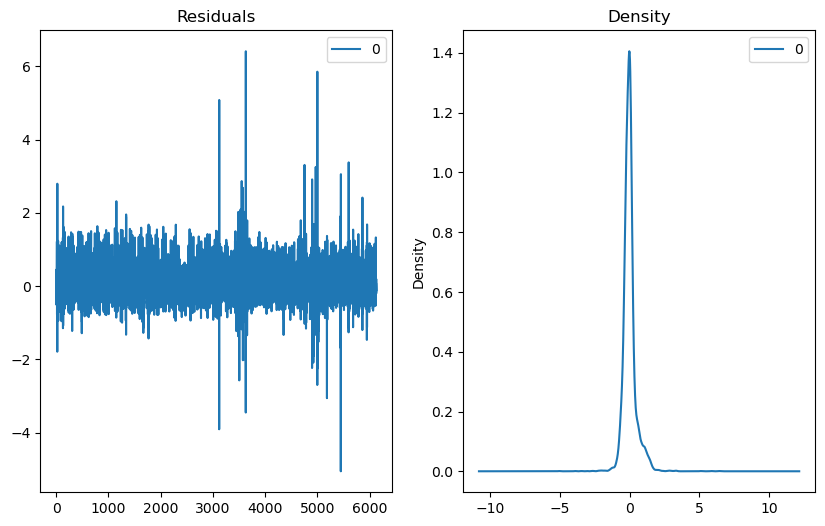

In [74]:

import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals = pd.DataFrame(residuals)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

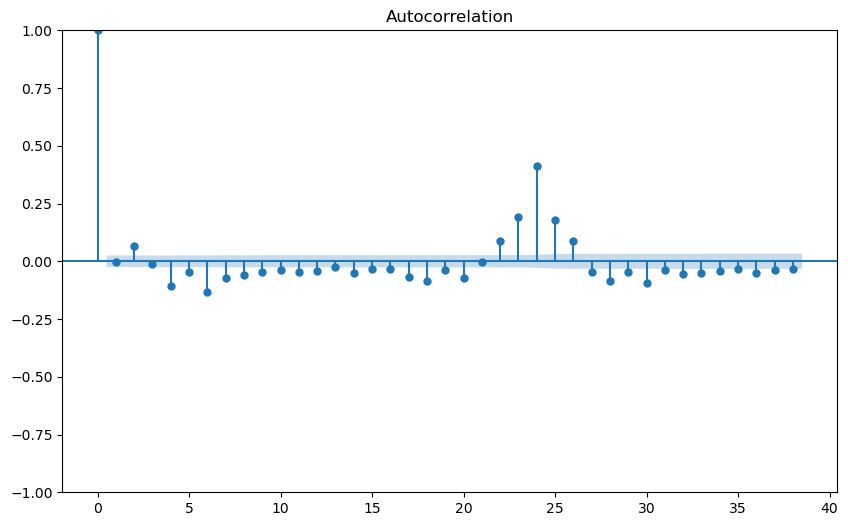

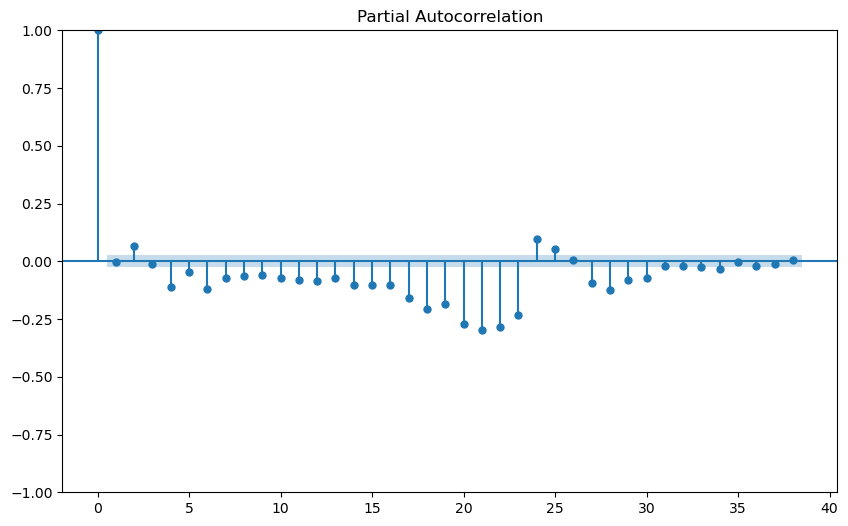

In [75]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<AxesSubplot:>

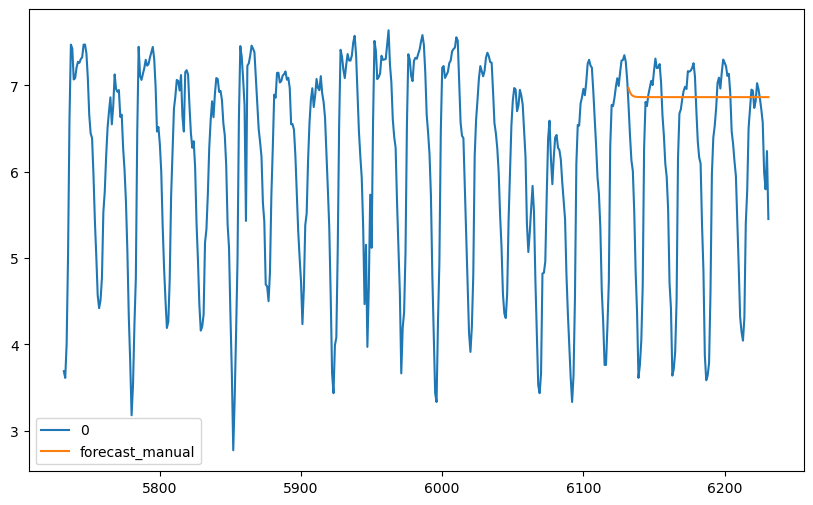

In [76]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1, 1, 1))
model_fit = model.fit()

forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df[-500:].plot()

In [77]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=True, m=1, trace=True)
auto_arima


 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=19959.876, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=13777.114, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=10708.644, Time=1.08 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=8721.660, Time=1.34 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=8023.071, Time=1.54 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=7473.466, Time=2.44 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=9345.739, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=8034.258, Time=1.00 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=7541.976, Time=1.51 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=7291.402, Time=2.91 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=7249.599, Time=2.51 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=7233.827, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=6867.577, Time=1.99 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=6599.218, Time=3.83 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=6533.402, Time=7.54 sec
 ARIMA(

ARIMA(order=(2, 0, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 6132
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -3259.696
Date:                Mon, 29 May 2023   AIC                           6533.392
Time:                        20:48:47   BIC                           6580.441
Sample:                             0   HQIC                          6549.713
                               - 6132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1656      0.014    455.202      0.000       6.139       6.192
ar.L1          1.8091      0.007    257.484      0.000       1.795       1.823
ar.L2         -0.8861      0.007   -136.143      0.0

<AxesSubplot:>

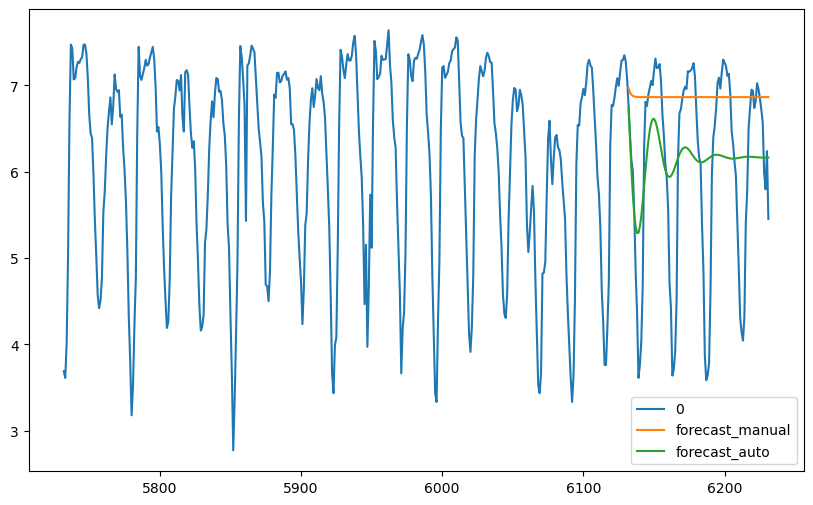

In [78]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels 
model = ARIMA(df_train, order=(2, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df[-500:].plot()


In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.9539576600651624
mape - manual: 0.20622375237333757
rmse - manual: 1.399459576716847


In [80]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.8237061103210902
mape - auto: 0.16162677640196813
rmse - auto: 1.0340083131962594


<AxesSubplot:>

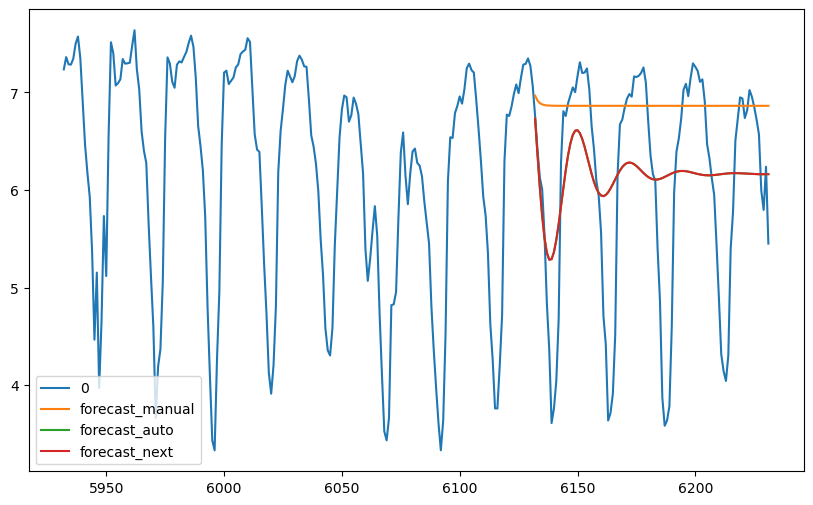

In [81]:
# predict for the next 100 entries
forecast_next = model_fit.forecast(100)
df['forecast_next'] = [None]*(len(df_train)) + list(forecast_next)

# show only the last 500 entries
df[-300:].plot()



In [82]:
# Build Model
model = ARIMA(df_train, order=(10, 0, 0))   # ARIMA(10, 0, 0) -> p = 10, d = 0, q = 0 
    # p means the number of lags to be used as predictors
    # d means the number of times that the raw observations are differenced
    # q is the size of the moving average window, also called the order of moving average
fitted = model.fit()


<Figure size 1200x500 with 0 Axes>

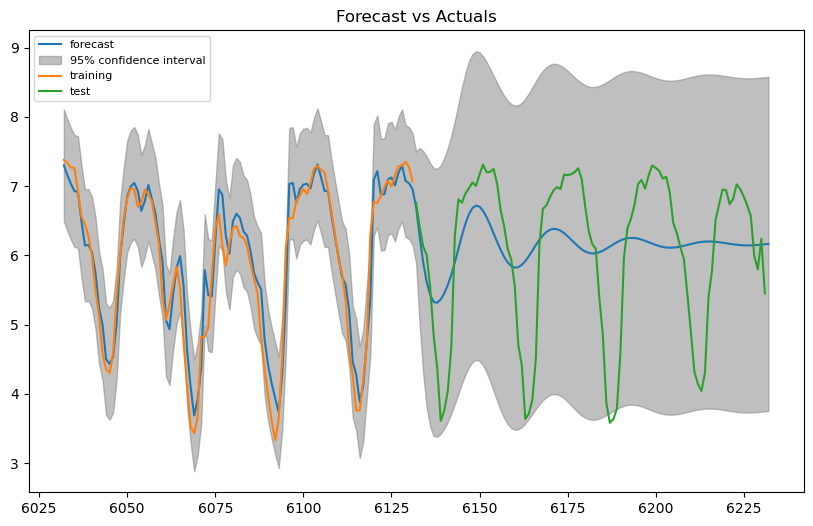

In [83]:
# Plot
plt.figure(figsize=(12, 5), dpi=100)
plot_predict(fitted, start=len(df_train)-100, end=len(df_train)+len(df_test))
plt.plot(df_train[-100:], label='training')
plt.plot(df_test, label='test')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()  

<Figure size 1200x500 with 0 Axes>

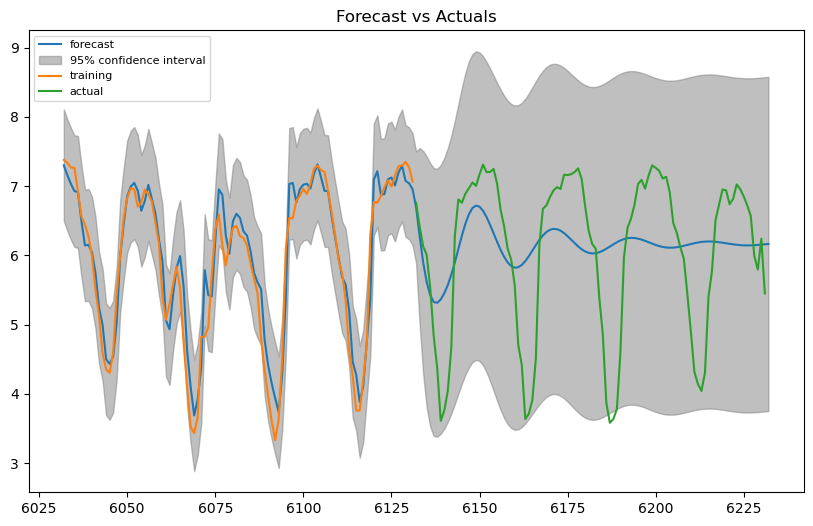

In [84]:

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plot_predict(fitted, start=len(df_train)-100, end=len(df_train)+len(df_test))
plt.plot(df_train[-100:], label='training')
plt.plot(df_test, label='actual')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()  

<AxesSubplot:>

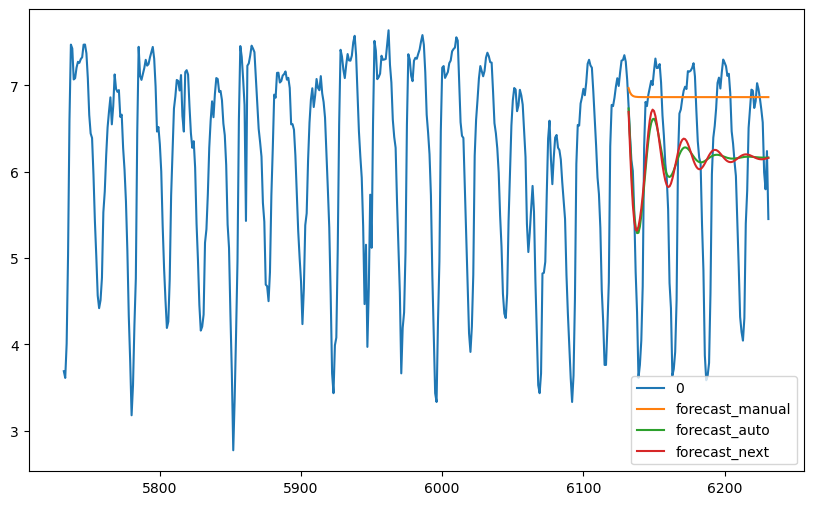

In [85]:
# now lets predict for the next 100 entries
forecast_next = fitted.forecast(100)
df['forecast_next'] = [None]*len(df_train) + list(forecast_next)

# show only the last 500 entries
df[-500:].plot()


In [86]:
# predict for the next 24 entries after the last entry from the test set
dfx = pd.concat([df_train, df_test], axis=0)

# divide into train and test
df_train = dfx[:-24]
df_test = dfx[-24:]

# Build Model
model = ARIMA(df_train, order=(10, 0, 3))  
model_fit = model.fit()

# Forecast the next 24 hours
forecast_next_day = model_fit.forecast(24)

pdx = df.copy()

# Assign the forecasted values to a new column
df['forecast_next_day'] = [None] * len(df_train) + list(forecast_next_day)
pdx['forecast_next_day'] = [None] * len(df_train) + list(forecast_next_day)
pdx.drop(['forecast_manual', 'forecast_auto', 'forecast_next'], axis=1, inplace=True)



In [87]:
print(len(dfx))

6232


In [88]:
# convert the entries on pdx 


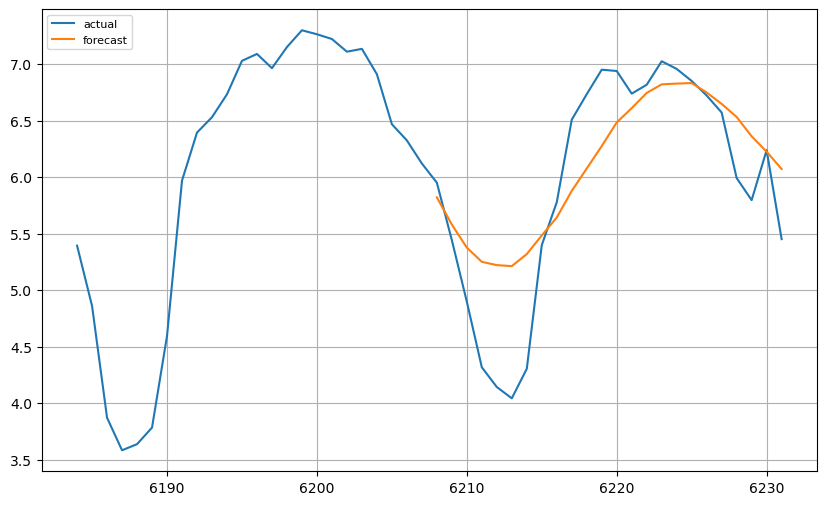

In [89]:
# plot
pdx[-48:].plot()
# add grid
plt.grid()
plt.legend(['actual', 'forecast'], loc='upper left', fontsize=8, )
''' # make each entry in the x-axis a multiple of 24
plt.xticks(np.arange(0, 1, 24))
# make each entry in the x-axis correspond to 1 hour 
plt.xticks(np.arange(0, len(pdx[-48:]), 1)) '''
plt.show()




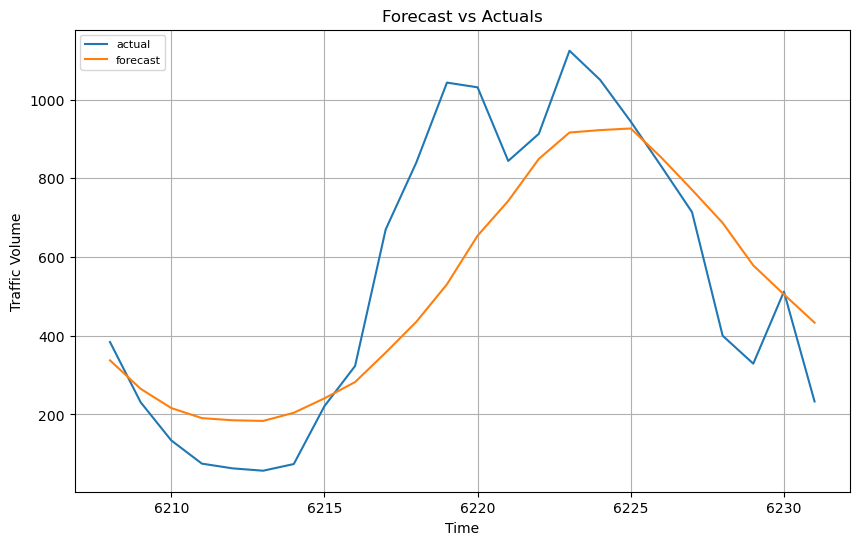

In [90]:
pdx.tail(24)

# convert the columns to exp 
pdx.iloc[:, 0] = np.exp(pdx.iloc[:, 0])
pdx['forecast_next_day'] = np.exp(pdx['forecast_next_day'])

# plot
pdx[-24:].plot()
# add grid
plt.grid()
plt.legend(['actual', 'forecast'], loc='upper left', fontsize=8, )
plt.title('Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.show()



In [91]:
# create an array with the datetime for the next 24 hours
next_day = pd.date_range(start=dfx.index[-1], periods=24, freq='H') # type: ignore

tss = datatimef['time_index']
tss

last_date = '2022-12-23 23:00:00'
last_date = pd.to_datetime(last_date)
last_date

next_day = pd.date_range(start=last_date, periods=24, freq='H') # type: ignore
# keep only the hours
next_day = next_day.strftime('%H:%M:%S')
next_day

Index(['23:00:00', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00',
       '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00',
       '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00'],
      dtype='object')

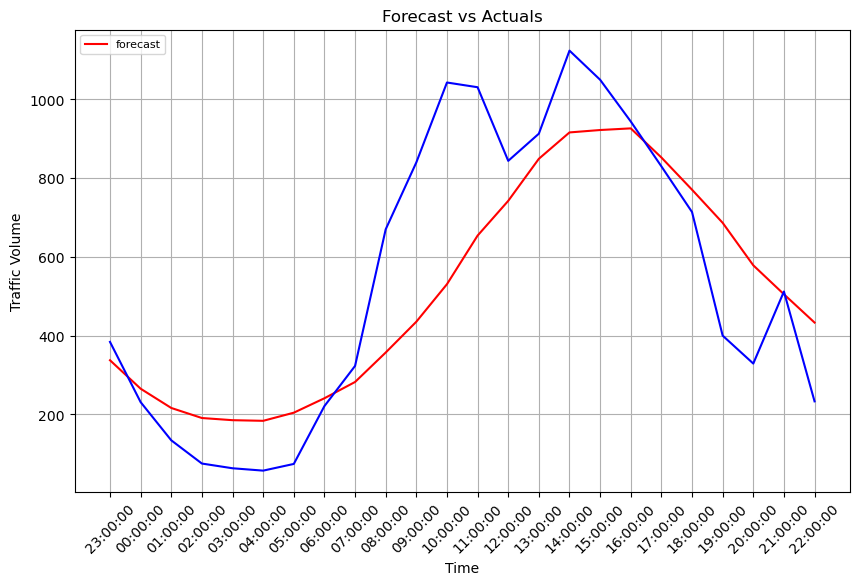

In [92]:

# add grid
plt.grid()
plt.plot(next_day, pdx['forecast_next_day'][-24:], color='red')
plt.plot(next_day, pdx.iloc[:, 0][-24:], color='blue')
plt.xticks(rotation=45) 
plt.legend(['forecast'], loc='upper left', fontsize=8, )
plt.title('Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.show()


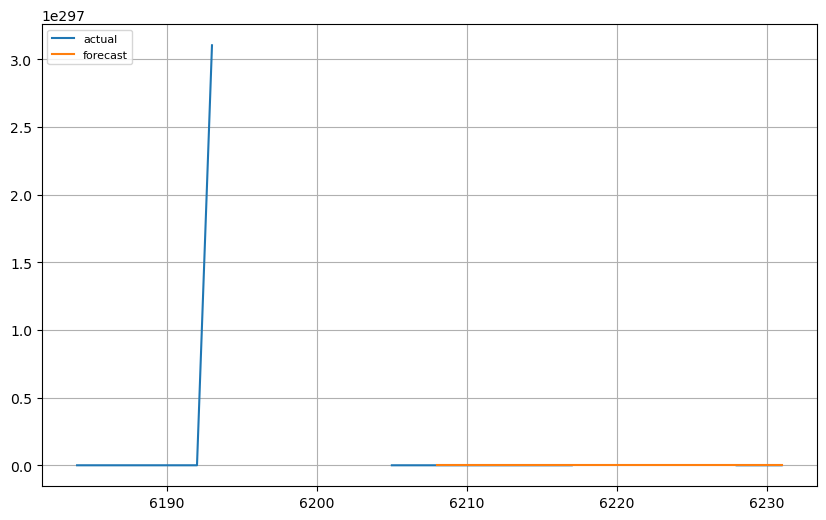

In [93]:
# access the 1st column of the dataframe pdx
pdx.iloc[:, 0]

# convert the entries on pdx back to exp
pdx.iloc[:, 0] = np.exp(pdx.iloc[:, 0])

# plot
pdx[-48:].plot()
# add grid
plt.grid()
plt.legend(['actual', 'forecast'], loc='upper left', fontsize=8, )
''' # make each entry in the x-axis a multiple of 24
plt.xticks(np.arange(0, 1, 24))
# make each entry in the x-axis correspond to 1 hour 
plt.xticks(np.arange(0, len(pdx[-48:]), 1)) '''
plt.show()


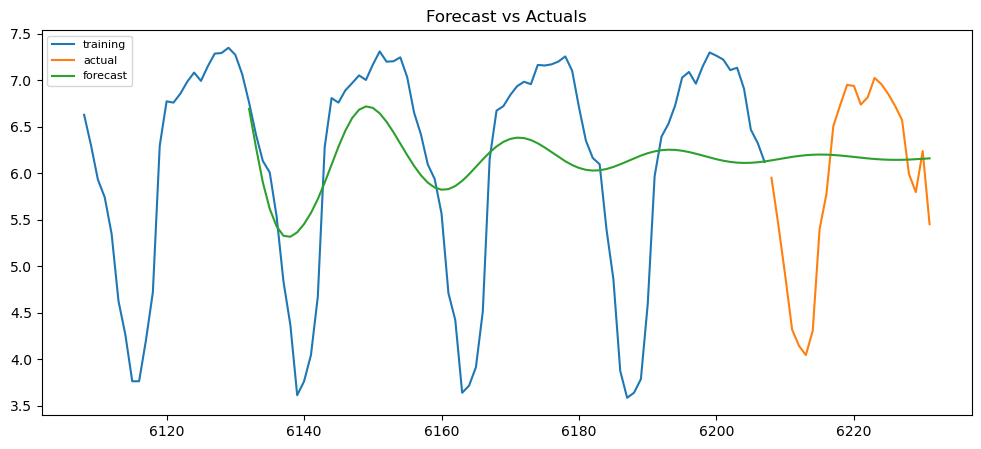

In [94]:
# create a plot that shows the actual values and the predicted values and then predicts the next 100 entries
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(df_train[-100:], label='training')
plt.plot(df_test, label='actual')
plt.plot(df['forecast_next'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()